In [62]:
import mne
from autoreject import AutoReject
from autoreject import get_rejection_threshold
from mne.preprocessing import ICA
import toml
import mne_bids
import re
from pathlib import Path


config = toml.load("../../.env.toml")

project_path = config["project"]["path"]

# Question to discuss

- Did I apply the right montage?
- What does the PRE mean in the data?


Reading EGI MFF Header from /Volumes/ExtremePro/DATA PATHS/DATI_PATHS/Raw_data/PATHS_149_Resting_pre_20221220_021457.mff...
    Reading events ...
    Assembling measurement info ...
Reading 0 ... 310342  =      0.000 ...   310.342 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 80 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 80.00 Hz
- Upper transition bandwidth: 20.00 Hz (-6 dB cutoff frequency: 90.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


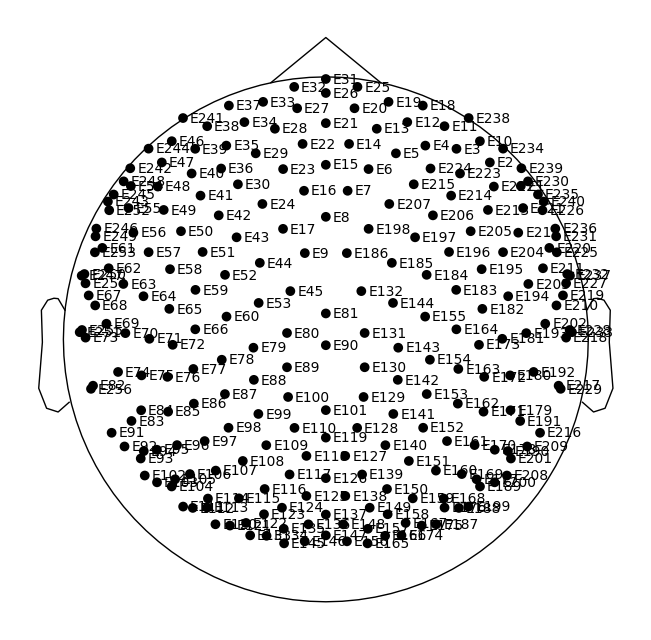

Using qt as 2D backend.
Using pyopengl with version 3.1.7


Channels marked as bad:
none


In [2]:
fname_path = "/Volumes/ExtremePro/DATA PATHS/DATI_PATHS/Raw_data/PATHS_101_Resting_20191120_022103.mff"

raw = mne.io.read_raw_egi(fname_path, preload=True ).resample(sfreq=250)
raw.set_montage('GSN-HydroCel-257', match_alias= {'VREF' :'Cz'})

raw_downsampled = raw.copy().resample(sfreq=250)
raw_filtered=raw_downsampled.filter(1, 80, fir_design='firwin') #removedrifts

raw.info['line_freq'] = 50.
freqs = (50, 100)
eeg_picks = mne.pick_types(raw.info, eeg=True)

raw_notch = raw_filtered.copy().notch_filter(freqs=freqs, picks=eeg_picks)
raw_notch.plot_sensors(show_names=True);
raw_notch.crop(tmin=1, tmax=301)

mne.viz.plot_raw(raw_notch)

# Analysis


In [1]:
spectrum = raw_notch.compute_psd()
spectrum.plot(average=True, picks="data", exclude="bads")

NameError: name 'raw_notch' is not defined

In [4]:
mne.viz.plot_raw(raw_notch)

: 

# Drop epochs


Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 300 events and 250 original time points ...
0 bad epochs dropped
Estimating rejection dictionary for eeg
The rejection dictionary is {'eeg': 0.0002007770278246885}
Using data from preloaded Raw for 300 events and 250 original time points ...
    Rejecting  epoch based on EEG : ['E61', 'E62', 'E67', 'E68', 'E73', 'E82', 'E91', 'E145', 'E146', 'E156', 'E165', 'E187', 'E188', 'E199', 'E201', 'E202', 'E209', 'E230', 'E231', 'E233', 'E234', 'E238', 'E241', 'E242', 'E243', 'E244', 'E245', 'E246', 'E247', 'E248', 'E249', 'E250', 'E251', 'E252', 'E253', 'E254', 'E255', 'E256']
    Rejecting  epoch based on EEG : ['E62', 'E67', 'E68', 'E73', 'E82', 'E91', 'E146', 'E156', 'E165', 'E187', 'E188', 'E199', 'E230', 'E234', 'E238', 'E239', 'E241', 'E242', 'E243', 'E244', 'E245', 'E246', 'E247', 'E248', 'E249', 'E251', 'E252', 'E253', 'E254', 'E255', 'E256']
    

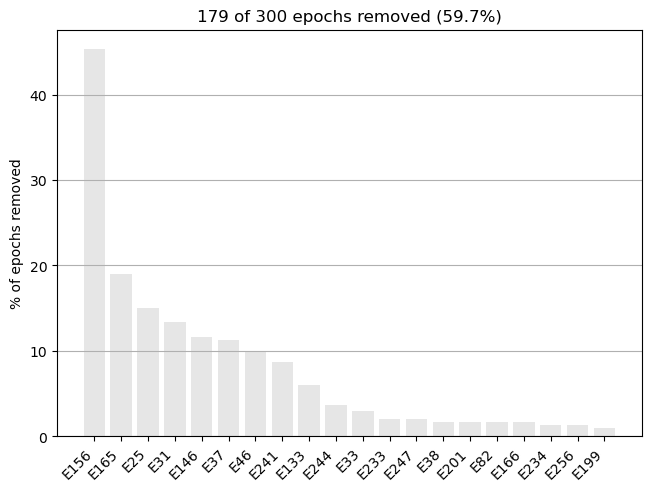

In [87]:
epochs=mne.make_fixed_length_epochs(raw_notch, duration=1.0, preload=False, proj=True)
reject = get_rejection_threshold(epochs)
print('The rejection dictionary is %s' % reject)
epochs.drop_bad(reject=reject)
epochs.plot_drop_log();

In [88]:
raw_notch_interp = raw_notch.copy()
raw_notch_interp.info["bads"].extend(["E156"])  # add a list of channels
raw_notch_interp = raw_notch_interp.interpolate_bads(reset_bads=False)


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 255 sensor positions
Interpolating 1 sensors


Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 300 events and 250 original time points ...
0 bad epochs dropped
Estimating rejection dictionary for eeg
The rejection dictionary is {'eeg': 0.0002252143537140802}
Using data from preloaded Raw for 300 events and 250 original time points ...
    Rejecting  epoch based on EEG : ['E61', 'E62', 'E67', 'E68', 'E73', 'E82', 'E91', 'E146', 'E165', 'E187', 'E188', 'E199', 'E201', 'E202', 'E230', 'E231', 'E233', 'E234', 'E238', 'E241', 'E242', 'E243', 'E244', 'E245', 'E246', 'E247', 'E248', 'E249', 'E250', 'E251', 'E252', 'E253', 'E254', 'E255', 'E256']
    Rejecting  epoch based on EEG : ['E67', 'E68', 'E73', 'E91', 'E146', 'E165', 'E187', 'E188', 'E230', 'E234', 'E238', 'E239', 'E241', 'E242', 'E243', 'E244', 'E245', 'E246', 'E247', 'E248', 'E249', 'E251', 'E252', 'E253', 'E254', 'E255', 'E256']
    Rejecting  epoch based on EEG : ['E146', 'E165', 'E231

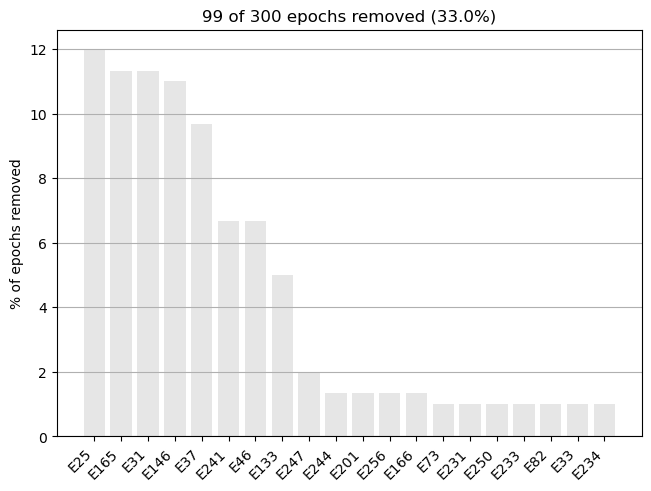

In [76]:
epochs=mne.make_fixed_length_epochs(raw_notch_interp , duration=1.0, preload=False, proj=True)
reject = get_rejection_threshold(epochs)
print('The rejection dictionary is %s' % reject)
epochs.drop_bad(reject=reject)
epochs.plot_drop_log();

# ICA


In [105]:
def run_ica(raw_notch_interp):
    ica = ICA(n_components=20, max_iter="auto", random_state=97)
    ica.fit(raw_notch_interp)
    ica

    explained_var_ratio = ica.get_explained_variance_ratio(raw_notch_interp)
    for channel_type, ratio in explained_var_ratio.items():
        print(
            f"Fraction of {channel_type} variance explained by all components: " f"{ratio}"
        )

    explained_var_ratio = ica.get_explained_variance_ratio(
        raw_notch_interp, components=[0], ch_type="eeg"
    )
    # This time, print as percentage.
    ratio_percent = round(100 * explained_var_ratio["eeg"])
    print(
        f"Fraction of variance in EEG signal explained by first component: "
        f"{ratio_percent}%"
    )
    return ica


ica = run_ica(raw_notch_interp)

Fitting ICA to data using 255 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 2.0s.
Fraction of eeg variance explained by all components: 0.9568850479060361
Fraction of variance in EEG signal explained by first component: 19%


In [106]:

ica.plot_sources(epochs, show_scrollbars=False)

Using data from preloaded Raw for 220 events and 250 original time points ...
Using data from preloaded Raw for 220 events and 250 original time points ...
Not setting metadata
220 matching events found
No baseline correction applied
0 projection items activated
Using pyopengl with version 3.1.6


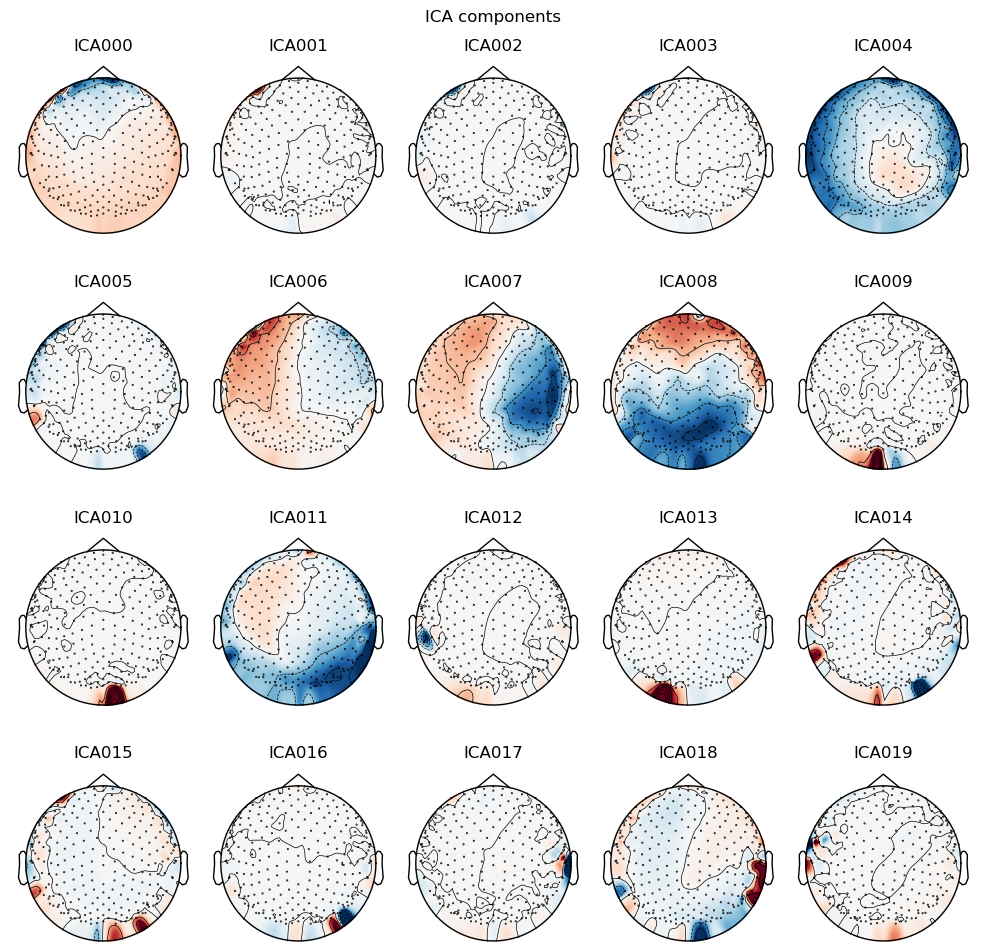

In [107]:
ica.plot_components();

In [108]:
ica.exclude = [9,10,13, 16,17]  # indices chosen based on various plots above
reconst_raw = raw_notch_interp.copy()
ica.apply(reconst_raw)

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 5 ICA components
    Projecting back using 255 PCA components


Measurement date,"December 20, 2022 13:14:56 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,259 points
Good channels,"255 EEG, 1 ECG"
Bad channels,E156
EOG channels,Not available
ECG channels,ECG
Sampling frequency,250.00 Hz
Highpass,1.00 Hz
Lowpass,80.00 Hz


In [109]:
reconst_raw.plot( show_scrollbars=False
)

Using pyopengl with version 3.1.6


Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 750 original time points ...
0 bad epochs dropped
Estimating rejection dictionary for eeg
The rejection dictionary is {'eeg': 0.0003310210542104646}
Using data from preloaded Raw for 100 events and 750 original time points ...
    Rejecting  epoch based on EEG : ['E67', 'E68', 'E73', 'E82', 'E91', 'E146', 'E165', 'E187', 'E201', 'E230', 'E231', 'E234', 'E241', 'E242', 'E243', 'E244', 'E245', 'E246', 'E247', 'E248', 'E249', 'E250', 'E251', 'E252', 'E253', 'E254', 'E255', 'E256']
    Rejecting  epoch based on EEG : ['E231']
    Rejecting  epoch based on EEG : ['E25', 'E31', 'E37', 'E46']
    Rejecting  epoch based on EEG : ['E256']
    Rejecting  epoch based on EEG : ['E247']
    Rejecting  epoch based on EEG : ['E25', 'E31']
    Rejecting  epoch based on EEG : ['E31']
    Rejecting  epoch based on EEG : ['E25', 'E31']
    Rejecting  

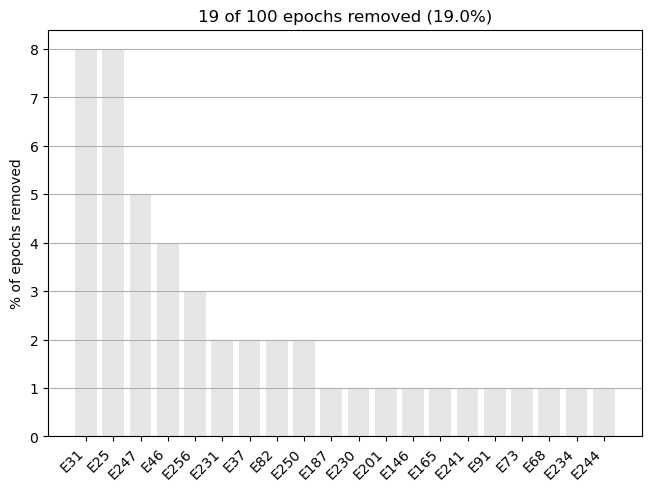

In [117]:
epochs=mne.make_fixed_length_epochs(reconst_raw , duration=3.0, preload=False, proj=True)
reject = get_rejection_threshold(epochs)
print('The rejection dictionary is %s' % reject)
epochs.drop_bad(reject=reject)
epochs.plot_drop_log();

In [ ]:
epochs.drop_bad(reject=reject).plot()

Using data from preloaded Raw for 81 events and 750 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 20 events and 750 original time points ...
Using data from preloaded Raw for 8 events and 750 original time points ...
Using data from preloaded Raw for 8 events and 750 original time points ...
Using data from preloaded Raw for 8 events and 750 original time points ...
Using pyopengl with version 3.1.6
Using data from preloaded Raw for 20 events and 750 original time points ...
Using data from preloaded Raw for 8 events and 750 original time points ...
Using data from preloaded Raw for 20 events and 750 original time points ...
Using data from preloaded Raw for 8 events and 750 original time points ...
Using data from preloaded Raw for 8 events and 750 original time points ...


Using data from preloaded Raw for 8 events and 750 original time points ...
Using data from preloaded Raw for 8 events and 750 original time points ...
Using data from preloaded Raw for 8 events and 750 original time points ...
Using data from preloaded Raw for 9 events and 750 original time points ...
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
['E156']


    Using multitaper spectrum estimation with 7 DPSS windows


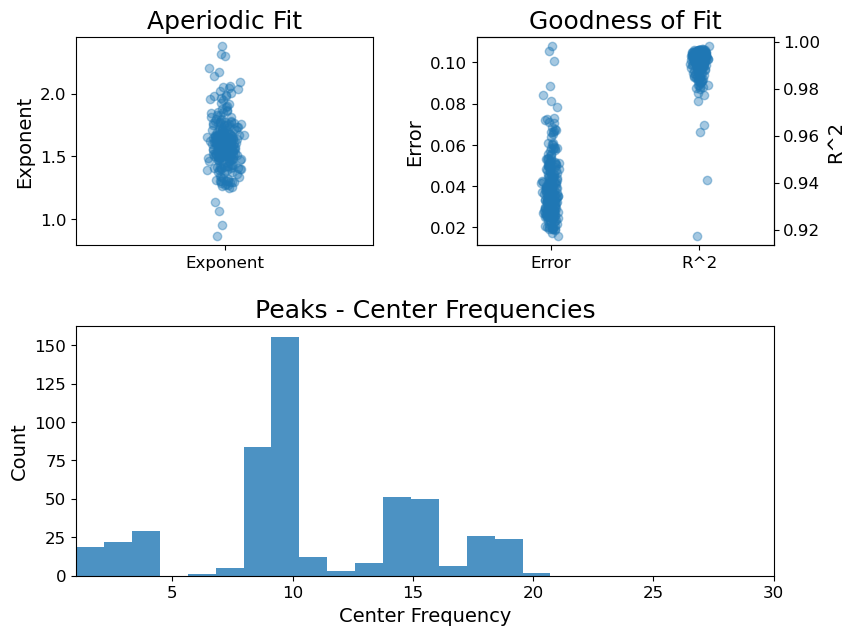

In [125]:
psd = epochs.compute_psd().average()
spectra, freqs = psd.get_data(return_freqs=True)
# Initialize a FOOOFGroup object, with desired settings

from fooof import FOOOFGroup
from fooof.bands import Bands
from fooof.analysis import get_band_peak_fg
from fooof.plts.spectra import plot_spectra
fg = FOOOFGroup(peak_width_limits=[1, 6], min_peak_height=0.15,
                peak_threshold=2., max_n_peaks=6, verbose=False)

# Define the frequency range to fit
freq_range = [1, 30]
fg.fit(freqs, spectra, freq_range)
fg.plot()

Using data from preloaded Raw for 81 events and 750 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...
Using data from preloaded Raw for 81 events and 750 original time points ...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


/Users/daniel/.pyenv/versions/spectral-3.11/lib/python3.11/site-packages/mne/viz/utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


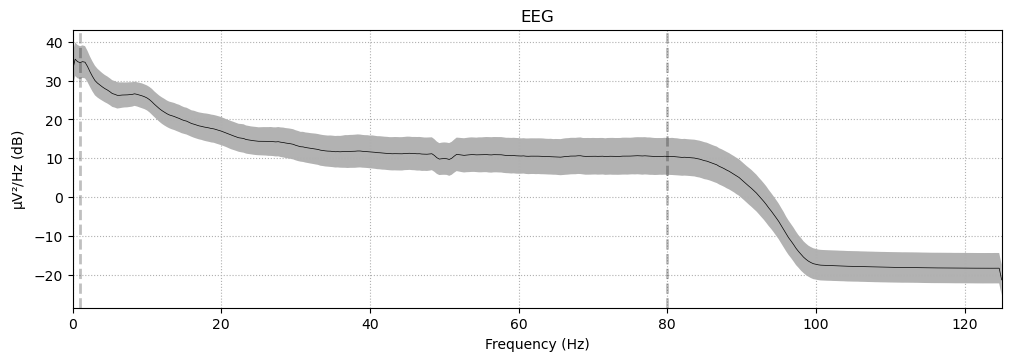

In [121]:
epochs.compute_psd().plot(average=True, picks="data", exclude="bads")
epochs.load_data()
epochs = epochs.set_eeg_reference()



In [126]:
# Define frequency bands of interest
bands = Bands({'theta': [3, 7],
               'alpha': [7, 14],
               'beta': [15, 30]})

In [127]:
# Extract alpha peaks
alphas = get_band_peak_fg(fg, bands.alpha)

# Extract the power values from the detected peaks
alpha_pw = alphas[:, 1]

ValueError: Number of channels in the Info object (256) and the data array (255) do not match. Pick Info with e.g. mne.pick_info and mne.channel_indices_by_type.

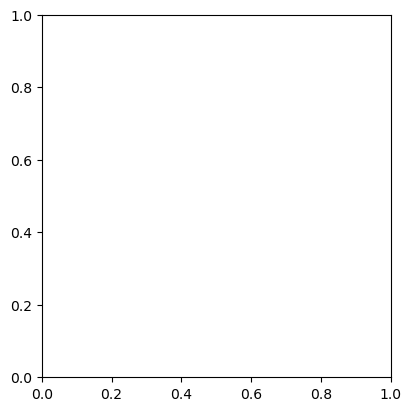

In [129]:
# Plot the topography of alpha power
from matplotlib import cm, colors, colorbar

mne.viz.plot_topomap(alpha_pw, raw.info, cmap=cm.viridis, contours=0, size=4)